In [8]:
import numpy as np

In [11]:
from time import time

def _convolve(x, h, switch=False):
    assert x.ndim == h.ndim == 1
    if switch and len(x) < len(h):
        x, h = h, x
    start = time()
    y = np.convolve(x, h, mode="same")
    return y, time() - start

In [12]:
times = []
for i, n in enumerate(np.logspace(2, 4).astype(int)):
    print(i, n)
    x = np.random.randn(n)
    h = np.random.randn(n * 10)
    results = {}
    for switch in [True, False]:
        y, t = _convolve(x, h, switch=switch)
        results[switch] = y
        times.append({"time": t,
                      "n": n,
                      "switch": switch
                     })
    assert np.allclose(results[True], results[False])

0 100
1 109
2 120
3 132
4 145
5 159
6 175
7 193
8 212
9 232
10 255
11 281
12 308
13 339
14 372
15 409
16 449
17 494
18 542
19 596
20 655
21 719
22 790
23 868
24 954
25 1048
26 1151
27 1264
28 1389
29 1526
30 1676
31 1842
32 2023
33 2222
34 2442
35 2682
36 2947
37 3237
38 3556
39 3906
40 4291
41 4714
42 5179
43 5689
44 6250
45 6866
46 7543
47 8286
48 9102
49 10000


In [13]:
results[True].shape

(100000,)

In [14]:
results[False].shape

(100000,)

Index(['time', 'n', 'switch'], dtype='object')


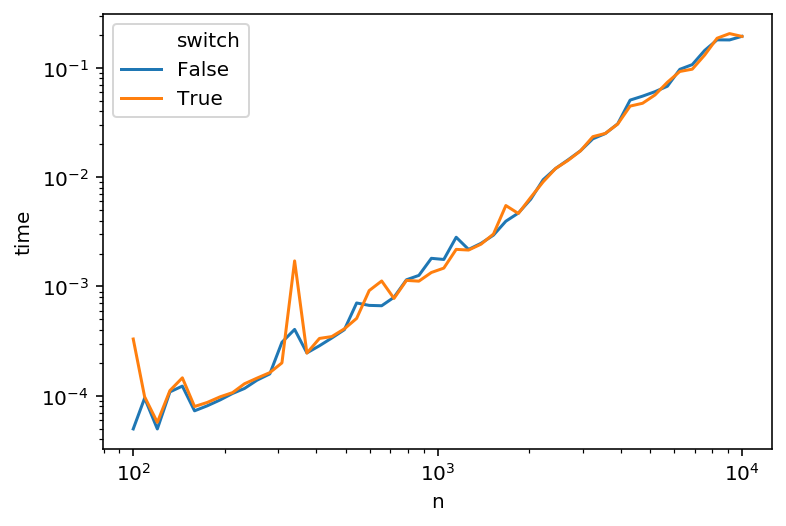

In [15]:
import altair as alt
import matplotlib.pyplot as plt
import pandas as pd
df = pd.DataFrame(times)
print(df.columns)
# fig, ax = plt.subplots()
# for switch in [True, False]:
#     df[df.switch == switch].plot(x="n", y="")
import seaborn as sns
ax = sns.lineplot(
    data=df,
    x="n",
    y="time",
    hue="switch",
)
ax.set_xscale("log", basex=10)
ax.set_yscale("log", basey=10)
